In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad

#parameters for NGC 5533
gamma = 0
h = 8.9                                                     #radial scale-length (kpc)
rc = 1.4                                                     #cut-off radius (kpc)
G = 4.300e-6                                                #gravitational constant (kpc/solar mass*(km/s)^2)
rho00 = 0.31e9                                              #central surface density (solar mass/kpc^3)

#equations
rhat = lambda r,z: np.sqrt((r**2)+(z**2))                   #r-hat from Casertano's eq(9)

rho = lambda r,rho00,rc: rho00*((1+((r/rc)**2))**(-1))        #isothermal density profile
v0h = lambda r,rho00,rc,z,G: np.sqrt(rho(r,rho00,rc)*4*np.pi*G*(rhat(r,z)**2))   #eq 9 Casertano
vh = lambda r,rho00,rc,z,G,gamma: v0h(r,rho00,rc,z,G)*((r/rc)**gamma)             #eq 18 halo velocity from Casertano's paper
#vh = lambda r,rho00,rc,z,G: v0h(r,rho00,R,z,G)              #eq 10 Casertano

print(rhat(1,1))
print(rho(1,rho00,rc))
print(vh(0.001,rho00,rc,0,G,gamma))

1.4142135623730951
205270270.27027026
0.12942551325967705


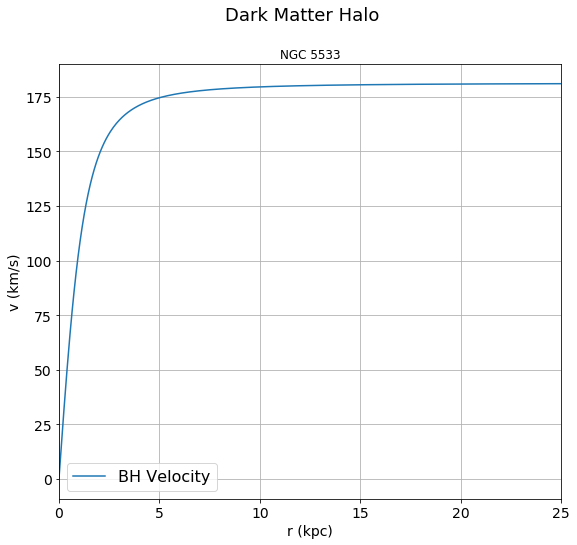

In [2]:
#plot orbital velocity for dark matter halo 
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

r = np.linspace(0, 25, 500)

plt.plot(r, vh(r,rho00,rc,0,G,gamma), linestyle='solid', label='BH Velocity')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Dark Matter Halo', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,25)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.savefig('DMVelocity.png')
plt.show()

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


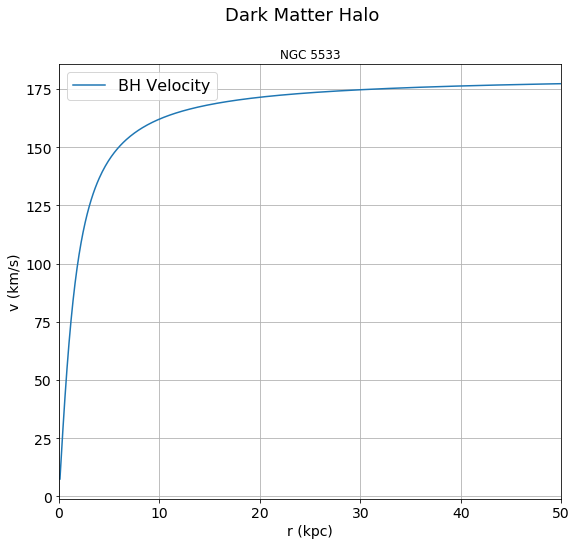

In [3]:
#isothermal density profile
#using a velocity equation from the paper "Dark halo properties from rotation curves" by Jimenez et.al.
vcdm = lambda r,G,rho00,rc: np.sqrt(4*np.pi*G*rho00*(rc**2)*(1-((rc/r)*np.arctan(r/rc))))       #eq 9 from Jimenez paper

#plot orbital velocity for dark matter halo 
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

r = np.linspace(0, 50, 500)

plt.plot(r, vcdm(r,G,rho00,rc), linestyle='solid', label='BH Velocity')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Dark Matter Halo', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,50)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.savefig('DMVelocity2.png')
plt.show()